# Forward Kinematics for a Spider Robot Leg

In this notebook, we will explore the forward kinematics for a leg of a spider robot. Forward kinematics is a fundamental concept in robotics that involves determining the position and orientation of the end-effector (in this case, the tip of the leg) given the joint angles.

The leg of our spider robot is modeled as a series of linkages connected by joints. We define the "base" of the leg where it connects to the body of the robot, and the "tip" of the leg as the end-effector. The leg has three segments: the coxa (connecting the base to the first joint), the femur (connecting the first joint to the second joint), and the tibia (connecting the second joint to the tip of the leg).

Each joint can rotate, changing the angle between the segments it connects. We'll denote these angles as theta1, theta2, and theta3 for the first, second, and third joints respectively.

We will be using Python for our calculations, with the `math` library for mathematical functions and `matplotlib` for 3D visualization.

>It's important to note that this is a naive implementation of forward kinematics which doesn't use Homogeneous Transformation Matrices (HTMs). HTMs provide a more sophisticated method for performing forward kinematics, especially for complex robotic systems. However, for our purposes, this simple approach will suffice and help us understand the basic principles of forward kinematics.

Let's get started!


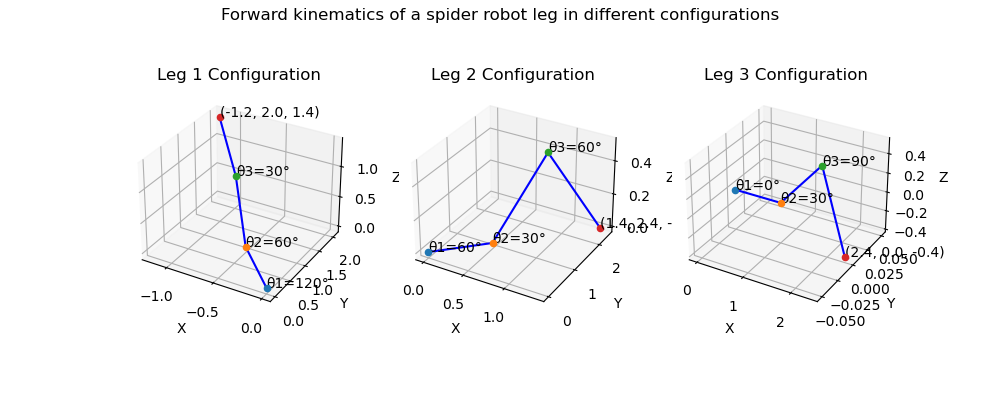

In [4]:
# Import necessary libraries
import math
import matplotlib.pyplot as plt
%matplotlib ipympl
# Define the SpiderLeg class
class SpiderLeg:
    # Initialize the class with lengths of leg segments
    def __init__(self, COXA, FEMUR, TIBIA):
        self.COXA = COXA
        self.FEMUR = FEMUR
        self.TIBIA = TIBIA
        self.theta1 = 0.
        self.theta2 = 0.
        self.theta3 = 0.

    # Method to set joint angles
    def set_angles(self, angles):
        self.theta1, self.theta2, self.theta3 = angles

    # Method to get current joint angles
    def get_angles(self):
        return [self.theta1, self.theta2, self.theta3]

    # Method to perform forward kinematics
    def forward_kinematics_naive(self):
        # Convert joint angles from degrees to radians
        theta1, theta2, theta3 = map(math.radians, self.get_angles())
        
        # Calculate x and y coordinates of coxa-femur joint
        Xa = self.COXA * math.cos(theta1)
        Ya = self.COXA * math.sin(theta1)
        
        # Calculate vertical component of femur length
        G2 = math.sin(theta2) * self.FEMUR
        
        # Calculate horizontal component of femur length
        P1 = math.cos(theta2) * self.FEMUR
        
        # Calculate x and y coordinates of femur-tibia joint
        Xc = math.cos(theta1) * P1
        Yc = math.sin(theta1) * P1
        
        # Calculate H, phi1, phi2, phi3, Pp, P2, Yb, Xb, G1
        # to get the coordinates of the tibia-tip joint
        H = math.sqrt(self.TIBIA**2 + self.FEMUR**2 - 2*self.TIBIA*self.FEMUR*math.cos(math.radians(180) - theta3))
        phi1 = math.acos((self.FEMUR**2 + H**2 - self.TIBIA**2) / (2*self.FEMUR*H))
        #phi2 = math.radians(180) - (math.radians(180) - theta3) - phi1
        phi3 = phi1 - theta2
        Pp = math.cos(phi3) * H
        P2 = Pp - P1
        Yb = math.sin(theta1) * Pp
        Xb = math.cos(theta1) * Pp
        G1 = math.sin(phi3) * H
        G1 = -G1

        # Create a list of joint locations
        joint_locations = [
            [0, 0, 0],  # start joint
            [Xa, Ya, 0],  # coxa-femur joint
            [Xa + Xc, Ya + Yc, G2],  # femur-tibia joint
            [Xa + Xb, Ya + Yb, G1]  # tip of the leg
        ]
        return joint_locations

    # Method to plot the leg and joint positions
    def plot(self, ax):
        joint_locations = self.forward_kinematics_naive()
        for idx, point in enumerate(joint_locations):
            ax.scatter(point[0], point[1], point[2])
            if idx > 0:
                ax.plot([joint_locations[idx - 1][0], point[0]],
                        [joint_locations[idx - 1][1], point[1]],
                        [joint_locations[idx - 1][2], point[2]], color='blue')
                ax.text(joint_locations[idx - 1][0], joint_locations[idx - 1][1], joint_locations[idx - 1][2], f"θ{idx}={self.get_angles()[idx-1]}°")
                if(idx==3):
                  ax.text(point[0], point[1], point[2], f"({round(point[0],1)}, {round(point[1],1)}, {round(point[2],1)})")



# Function to create and plot a SpiderLeg
def create_and_plot_leg(ax, angles, title):
    leg = SpiderLeg(1, 1, 1)
    leg.set_angles(angles)
    leg.plot(ax)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# Create a figure with three subplots and plot the joint positions of the legs
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(131, projection='3d')
create_and_plot_leg(ax1, [120, 60, 30], "Leg 1 Configuration")

ax2 = fig.add_subplot(132, projection='3d')
create_and_plot_leg(ax2, [60, 30, 60], "Leg 2 Configuration")

ax3 = fig.add_subplot(133, projection='3d')
create_and_plot_leg(ax3, [0, 30, 90], "Leg 3 Configuration")

# Add a description to the plot
plt.suptitle("Forward kinematics of a spider robot leg in different configurations")

plt.show()
